## MULTI DOCUMENT TEXT SUMMARIZATION USING K-MEANS CLUSTERING ALGORITHM

### 1. importing necessary libraries.

In [2]:
import math
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### 2. Loading data & Text Preprocessing..

* I have taken 8 articles on COVID from google search results, I have made them as my dataset.
* while doing this project, I know little about Data Science, so I didn't thought of collecting or scraping data(more documents), more data will give good results.

In [3]:
docs = []
all_docs_content = ""
# reading each file and extracting text content.
for i in range(1, 9):
    with open ("docs/d"+str(i)+".txt", "r") as myfile:
        # Removing new_line_spaces
        curr_doc = myfile.read().replace("\n", "")
        docs.append(curr_doc)
        all_docs_content += curr_doc

#text_str = all_docs_content
sentences = all_docs_content.split(".")
print('total sentences', len(sentences))

removed_and_added_sents = []
sent_len = len(sentences)
while i < sent_len:
    if len(sentences[i]) < 10:
        removed_and_added_sents.append(sentences[i])
        if i == (len(sentences) - 1):
            sentences[i-1] += sentences[i]
            del sentences[i]
            i = i-1
        else:
            sentences[i+1] += sentences[i]
            del sentences[i]
            i = i-1
        sent_len = len(sentences)
    i += 1
print('removed but added_sents : ', removed_and_added_sents)
print('total sentences now : ', len(sentences)) # sent_len

total sentences 289
removed but added_sents :  [' Tosh, M', 'D Tosh, M', 'S', 'D', ', MD', 'P, MD', 'HP, MD', 'S', 'NS', ', RNS', 'N, RNS', '  ']
total sentences now :  277


* there is no need of multiple loops to recheck the smallest sentences.
* the code internally loop back and add small sentences to big or average sentences and deletes the small sentences.

### 3. Featurization

In [4]:
# from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf is better compared to BoW (write a paragraph to prove)
vec_tfidf = TfidfVectorizer(stop_words='english') #tokenizer=textblob_tokenizer, 
matrix_vec_tfidf = vec_tfidf.fit_transform(sentences)
x = pd.DataFrame(matrix_vec_tfidf.toarray(), columns=vec_tfidf.get_feature_names())
x.head()

,112,14,19,19how,20,2019,2019d,2020,48,60,...,workplace,workplacegood,world,worldwide,worn,worry,worrying,wuhan,year,young
0,0.0,0.0,0.138974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import numpy
x_list = x.to_numpy().tolist()

# calculating tfidf score of each setence and adding to a list
tfidf_scores_of_each_sent = []
for i in x_list:
    summ = 0
    for j in i:
        summ += j
    tfidf_scores_of_each_sent.append(summ)

# adding tfidf value of sentence as key and sentence index as value(for sorting based on key)
tfidf_sent_dict = {}
for i in range(0, len(tfidf_scores_of_each_sent)):
    tfidf_sent_dict[tfidf_scores_of_each_sent[i]] = i

# sorting sentences based on tfidf values
sorted_tfidf_sent_dict = sorted(tfidf_sent_dict.items())
# storing top 8 values based on tfidf values. (8 is taken approximately : #docs)
top_vals = []
print('## Summary based on TfIdf : sentences that have high tfidf score')
for i in range(len(sorted_tfidf_sent_dict)-1, len(sorted_tfidf_sent_dict)-9, -1):
    print("\n* {}".format(sentences[sorted_tfidf_sent_dict[i][1]]))
    top_vals.append(x_list[sorted_tfidf_sent_dict[i][1]])

## Summary based on TfIdf : sentences that have high tfidf score

* You should only leave your home to: shop for essential food and household goods attend medical appointments, collect medicine or other health productscare for children, older people or other vulnerable people - this excludes social family visitsexercise outdoors - within 2 kilometres of your home, changing to 5 kilometres from 5 May - only with people from your own household, keeping 2 metres between you and other peopletravel to work if you provide an essential service - be sure to practice social distancingThere is separate advice about:restricting your movements if you live with someone who has symptoms, a confirmed case or has returned to Ireland from another countryself-isolating if you have symptoms of coronavirustaking extra care if you're in a high risk groupcocooning for people who are at very high risk (extremely vulnerable)Avoid non-essential travel overseas and follow the Department of Foreign Affairs trave

* TfIdf gave us important features where most of the sentences are big.

#### 3.1 Plotting the sentences and marking the top Tfidf valued sentences.

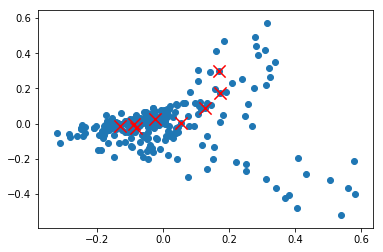

In [6]:
pca = PCA(n_components=2, random_state=0)
#reduce the features and cluster centers to 2D
reduced_features = pca.fit_transform(x)
reduced_vals = pca.transform(top_vals)

plt.scatter(reduced_features[:,0], reduced_features[:,1])
plt.scatter(reduced_vals[:, 0], reduced_vals[:,1], marker='x', s=150, c='r')
plt.show()

* The plot says which part of the region the sentence is selected, and no much info in it.
* so, we can say that we should depend only on text importance.
* to generate summary we should use better models. let's see..

### 4 Using Kmeans Clustering algorithm on TfIdf vectorized data..

In [7]:
from sklearn.cluster import KMeans
from tqdm import tqdm

* there are methods to choose 'k', but while doing this project I had less knowledge about it, so I have considered n = #docs

In [8]:
number_of_clusters = 8 # no.of docs..
km = KMeans(n_clusters=number_of_clusters)
km.fit(x)

KMeans()

In [9]:
import numpy

ldf = x.to_numpy().tolist()
kc = km.cluster_centers_.tolist()

print('\n## Summary for "Protection from Corona Virus" :')
ds = []
for j in range(0, len(kc)):
    ds = []
    for i in range(0, len(ldf)):
        if km.labels_[i] == j:
            dist = numpy.linalg.norm(numpy.array(ldf[i]) - numpy.array(kc[j]))
            if dist < 0 :
                dist = -(dist)
            ds.append(dist)
        else:
            ds.append(100)
    print("\n{}. {}".format(j, sentences[ds.index(min(ds))])) # , ds.index(min(ds))


## Summary for "Protection from Corona Virus" :

0.  Some people have no symptoms

1. Social distancing is important to help slow the spread of coronavirus

2. Clean your hands properly before you put it on

3. Cover your mouth and nose with your elbow or a tissue when you cough or sneeze

4. Avoid touching your eyes, nose and mouth

5.  Health officials have emphasized that wearing a mask isn't a substitute for staying home as much as possible and practicing social distancing

6. What are the symptoms of COVID-19?COVID-19 symptoms can be very mild to severe

7. Wash your hands often with soap and water for at least 20 seconds, or use an alcohol-based hand sanitizer that contains at least 60% alcohol


* here the result doesn't depend on size of sentence.

#### 4.1 Plot : Marking Cluster centers on Data points

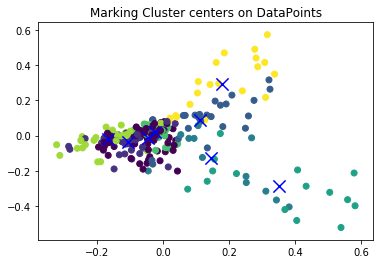

In [10]:
# len(km.labels_) #277
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(x)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(km.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(x))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.title("Marking Cluster centers on DataPoints")
plt.show()

* Almost every region is covered, such that a sentence is selected from each region and all the sentences in summary differ on from other.